In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The dataset contains the data of the customer.On the basis of the data we have to predict the churn rate by the customer.

The dataset contains the data like'customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneServices','Multiplelines', 'internetservice','OnlineSEcurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges',and'Churn'

Churn rate(sometimes called attrition rate),in its beroadest sence,is a measure of the number of individuals or items moving out of a collective group over a specific period.it is one of two primary factors that determine the steady-state level of customers a business will support.The term is used in many contexts,but is most widely applied in business with respect to a contractual customer base, for examplein businesses with a subscriber-basedservice model such as mobile telephone networks and pay TV operators.The term is also used to refer to participant turnover in peer-to-peer networks.Churn rate is an input into customer lifetime value modeling, and can be paet of a simulator used to measure return on marketing investment using marketing mix modeling.

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv') #github link
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This Dataset contains the details of customers in which both numerical and categorical data are present.Here "Churn" is the target variable which contains 2 categories so it will be termed as 'classification problem' where we need to predict the several churn using the classification models.

In [3]:
df.head(14)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Exploratory Data analysis (EDA)

In [5]:
# checking the dimensions of the dataset
df.shape

(7043, 21)

the dataset contains 7043 rows and 21 columns.Out of which 1 is target variable(label,Dependent variable) and remaining 20 are independent variables(features,input variables)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking the column of the dataset and we are storeing it in the list
# before columns was in a index values and here i am storeing all the columns names in a list 
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

There are three different types of data (int64,float and object) present in the dataset

In TotalCharges column the numerical values are present (the continous data or float values) are present but when i am checking the datatype it is mentioning the object datatype, it means something is wrong in TotalCharges column

In [8]:
# checking the null values present or not
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see there are no null values present in this dataset.

<AxesSubplot:>

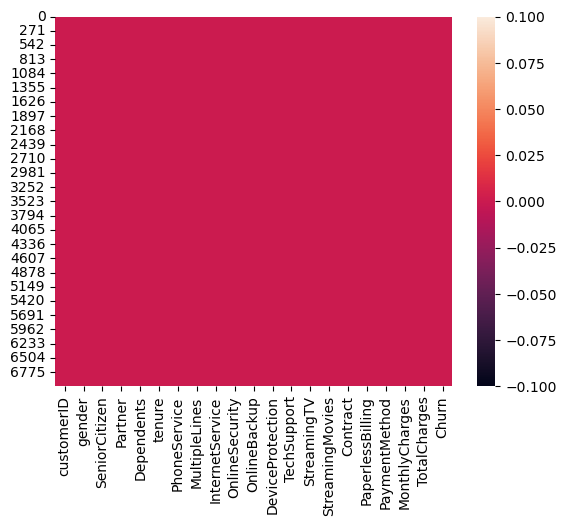

In [11]:
# lets visualize it using heatmap
sns.heatmap(df.isnull())

we are not clear why the object datatype is present in my TotalCharges column, so thats why first we have to check the number of unique values, what is the valuecount of every unique value present in the TotalCharges column.so that we can get the idea, what is the reason of this object datatype in the column where the continous data are present.

so that we are using the unique() function for totalcharges column

In [12]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df['TotalCharges'].nunique() 

6531

In [14]:
# checking value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

These are the value counts and we can see blank in TotalCharges column.

we can notice that "TotalCharges" has continous data but its reflecting as object datatype. And 11 records of this column has blank data (means 11 white spaces are present)

just because of this 11 white spaces the object datatype is present

In [15]:
# Checking/Confirming the same thing (means--> space) in TotalCharges coloumn using .loc method
# here i am applying loc method on the TotalCharges column and the condition here is the "white spaces".

df.loc[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column has space as values but it was showing 0 missing values in this column. lets fill this column by some values.

In [16]:
# replacing white spaces with nan values.
df['TotalCharges']=df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [17]:
df.isnull().sum()   # checking null values again

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now you can see 11 null values are present in my TotalCharges column, and these 11 null values were my white spaces or blank spaces,blank data that was present in my TotalCharges column at 11 different index.

## Changing Datatype of TotalCharges column

In [18]:
# converting object datatype to float datatype ( for that using .astype() method)
df["TotalCharges"]=df["TotalCharges"].astype(float)
df["TotalCharges"].dtype

dtype('float64')

Now we can see TotalCharges column has some space values which is replaced by nan values and we have changed the data type of my column from object to float datatype.Now we will handle the nan values.

As we have filled blank spaces with nan values in TotalCharges, its showing 11 null values in that column.Replacing the NAN values using mean method as the data has continous values.

In [19]:
# Here i am considering the np.mean() method, and applying mean method on TotalCharges column. 
np.mean(df["TotalCharges"])

2283.3004408418697

In [20]:
# i am going to replacing the NAN values with the mean of TotalCharges column
# here i am using .iloc method, so that i can see what are the NAN values are present,whether what is the data present or not
#  (i represents the index based values),here i am performing the operation on the basis of indexing
# here i am checking for the 488 index value and whole column
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

yes, in TotalCharges, white space is replaced by NAN

In [21]:
# checking the mean of the TotalCharges column
print('The mean value of the TotalCharges is',df['TotalCharges'].mean())

The mean value of the TotalCharges is 2283.3004408418697


In [22]:
# filling null values in totalcharges column with its mean (by using .fillna() method)
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())


In [23]:
# i have replaced the NAN values with the mean, now if i am checking for the index value that is 488 
# here you can see, for the TotalCharges column the nan values are replaced with 2283.300441
df.iloc[488,:]


customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

The Null values in TotalCharges column are replaced with the mean value of the same column.

<AxesSubplot:>

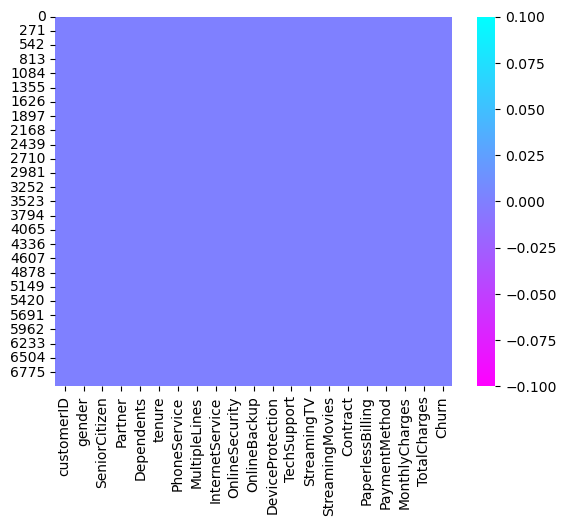

In [24]:
# lets check the null values again with the heatmap
sns.heatmap(df.isnull(),cmap="cool_r")

In [25]:
# Seperating Numerical andCategorical columns

# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('categorical_columns:',categorical_col)
print('\n')

# checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('numerical_columns:',numerical_col)

categorical_columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


numerical_columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [26]:
# checking the number of unique values in each column
# .to_frame() ,method is used to convert the values in a Dataframe
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In the customerID column all the values are unique, and maybe they are not playing import roll.so we can drop it
These are the unique values present in the dataset.here CustomerID column has the data of unique ID to the customers which can be dropped.Because it is not going to contribute in the prediction of my model.

In [27]:
# Dropping CustomerID column
df.drop("customerID",axis=1,inplace=True)

In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# checking the unique values in targrt variable(label)
# checking the number of unique values
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

These are the two categories present in the target column namely "yes" and "No"

By looking at this we can say that, this is a Binary Classification problem

In [31]:
# checking count of each unique values in target column
# i am using value_counts() function so that i can fetch out the count value
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

the customers who are not changing/switching there count is 5174 out of 7043. And "yes" it is 1864. you can see the difference between these two( No, yes).so i can say that those who are not switching they are the loyal customers. and for the "yes" they are also loyal but they are facing some problems

we can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.

### Description of Dataset

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


this gives the statistical information of the numerical columns.The summary of the dataset looks perfect since there is no negative/ invalid values present

from the above description we can observe the following

The counts of all the columns are same which means there are no missing values in the dataset.

The mean value is greater than the median(50% is called median) in tenure and TotalCharges columns which means the data is skewed to right in these column.

The data in the column MonthlyCharges have mean value less than median(50% is called median) which means the data is skewed to left.
By summarizing the data we can observe there is a huge difference between 75% and the maximum value (if i am compairing the range, then definitely for the monthlyCharges column there is a big difference and for the TotalCharges column there is very big difference).so there are chances that the ouliers present in the data.
we can also notice the standard deviation,minimum value ,25% percentile values from describe method

## Data visualization

No     5174
Yes    1869
Name: Churn, dtype: int64


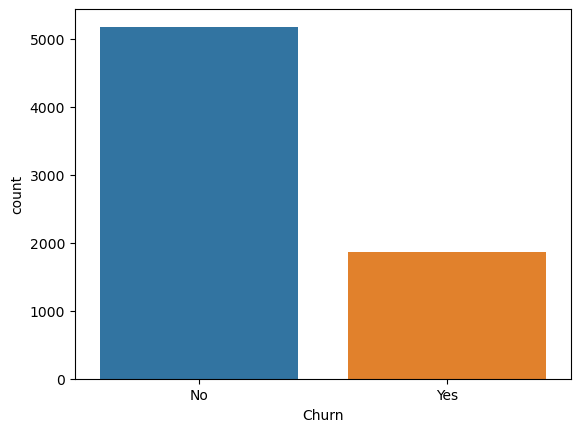

In [33]:
# Visualize the number of churned customers

ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

we can observe that the count of "No Churn" are high compared to the count of"Yes Churn" that is, there are more number of customers who have not churned.
This leads to class imbalance issue in the data.

Male      3555
Female    3488
Name: gender, dtype: int64


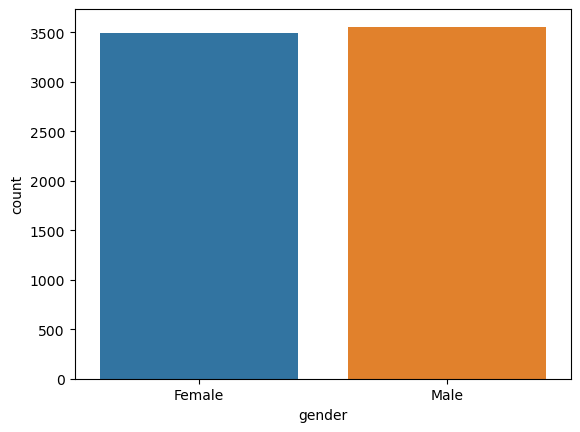

In [34]:
# visualizing the count of gender 
print(df['gender'].value_counts())
ax=sns.countplot(x='gender',data=df)
plt.show()

from the plot we can observe that the total number of males and females are almost same

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


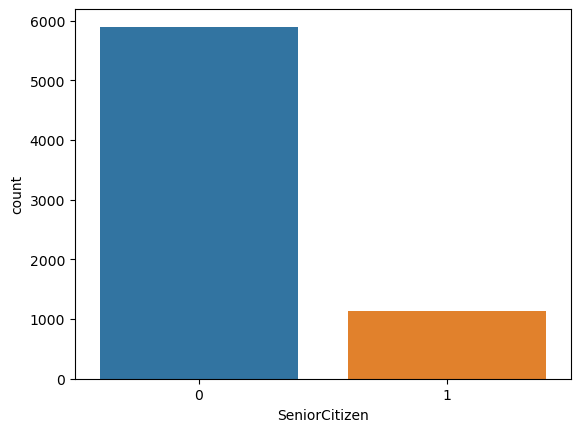

In [35]:
# visualizing the count of SeniorCitizen 
print(df['SeniorCitizen'].value_counts())
ax=sns.countplot(x='SeniorCitizen',data=df)
plt.show()

here in SeniorCitizen the difference is more between the classes, but this is not my target variable,so we cannot consider this case as a class imbalance
Here 0 represents non senior citizens and 1 represents senior senior citizens. The count of 0 is high compaired to 1 which means the number of non senior citizens are quite high compaired to senior citizens data in the dataset

No     3641
Yes    3402
Name: Partner, dtype: int64


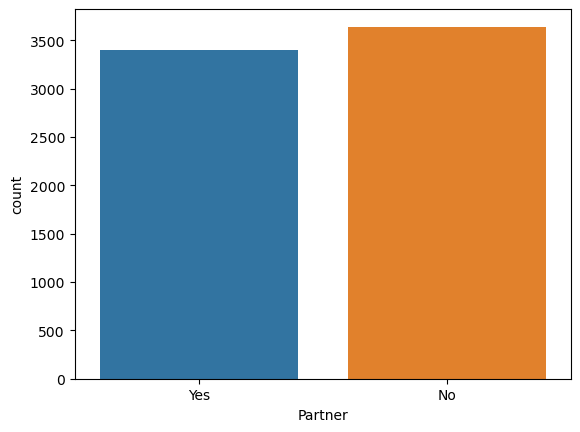

In [36]:
# visualizing the count of Partner 
print(df['Partner'].value_counts())
ax=sns.countplot(x='Partner',data=df)
plt.show()

partner means, the customers those who are having partner. eg-married, or they are taking plan/services of any operator with other member

those who have no partner their count is little bit high as compair to those who have partner

No     4933
Yes    2110
Name: Dependents, dtype: int64


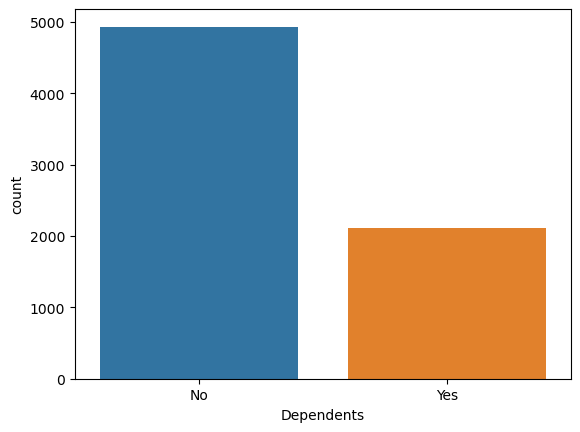

In [37]:
# visualizing the count of Dependents 
print(df['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=df)

the customers who have dependents are less compaired to non dependents

dependents eg - students (they are not allowed to use phone, they use their parents phone)

Yes    6361
No      682
Name: PhoneService, dtype: int64


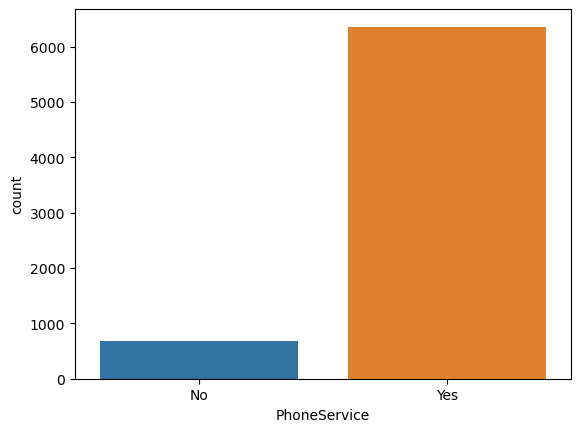

In [39]:
# visualizing the count of PhoneService 
print(df['PhoneService'].value_counts())
ax=sns.countplot(x='PhoneService',data=df)

the customers who use phone services are large in numbers and who do not own phone services are very less in number.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


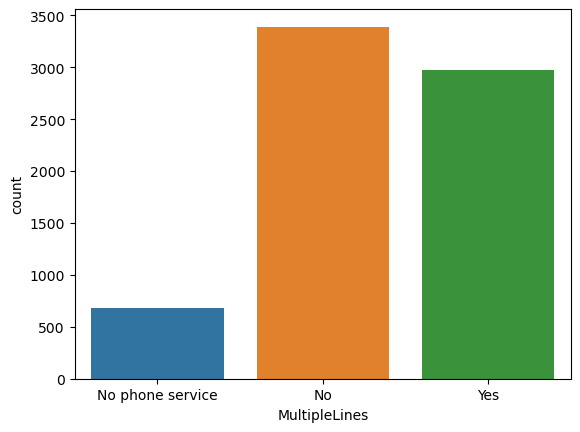

In [40]:
# visualizing the count of MultipleLines 
print(df['MultipleLines'].value_counts())
ax=sns.countplot(x='MultipleLines',data=df)

the customers having phone services from single line have high counts compaired to the customers having phone services from multiple lines also the customers who do not have phone services have covered very less data compaired to others

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


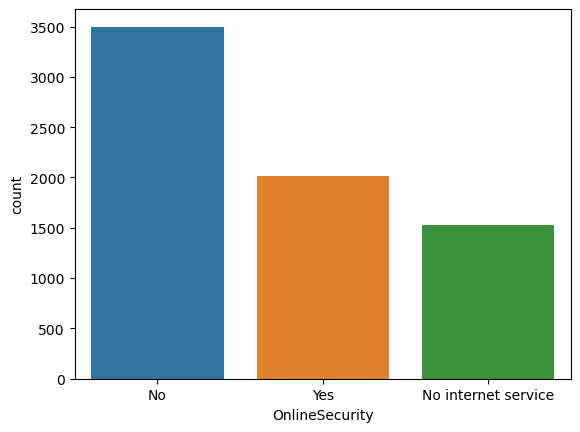

In [41]:
# visualizing the count of OnlineSecurity 
print(df['OnlineSecurity'].value_counts())
ax=sns.countplot(x='OnlineSecurity',data=df)

the customers having internet services needs online security and who do not own any internet services,they do not need any online security.But from the plot we can observe the majority of the customers who have internet services have low online security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


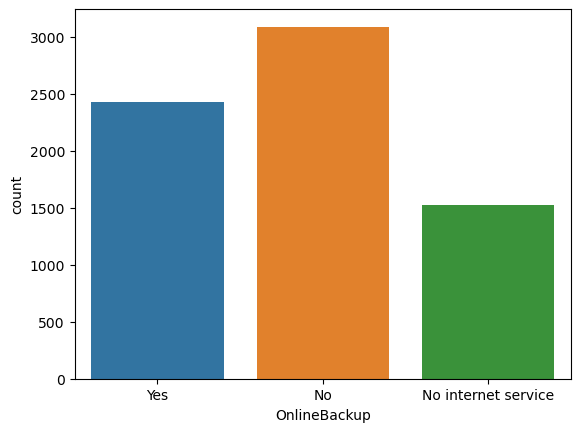

In [42]:
# visualizing how many customers have OnlineBackup 
print(df['OnlineBackup'].value_counts())
ax=sns.countplot(x='OnlineBackup',data=df)

we can observe that the customers having no internet services have very less online ackup counts compaired to others

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


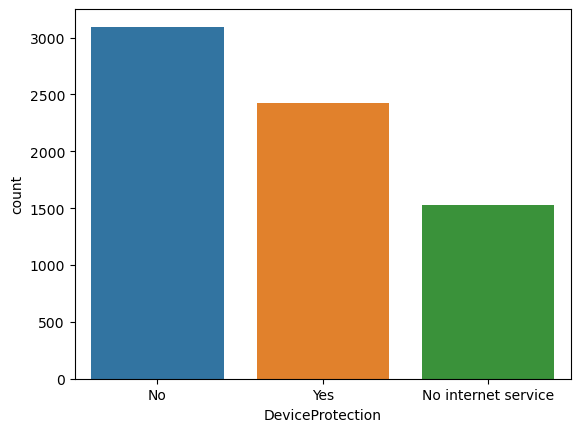

In [43]:
# visualizing how many customers have DeviceProtection 
print(df['DeviceProtection'].value_counts())
ax=sns.countplot(x='DeviceProtection',data=df)

the count of "No", that is, the customers using internet services but not using device protection their count is high. and"yes", that is, the customers using internet services and also using device protection their count is less. the customer who do not have internet acess,they do not need any device protection

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


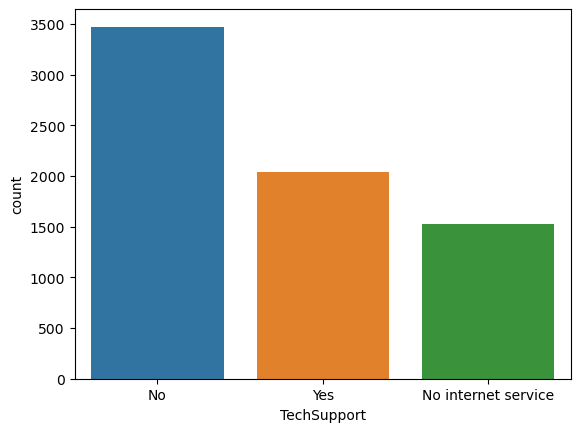

In [44]:
# visualizing how many customers have TechSupport 
print(df['TechSupport'].value_counts())
ax=sns.countplot(x='TechSupport',data=df)

the customer who use internet and do not need any technical support are high in counts as compaired to the customers who use internet and need technical support. the count of customer who not use internet service remain same as previous.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


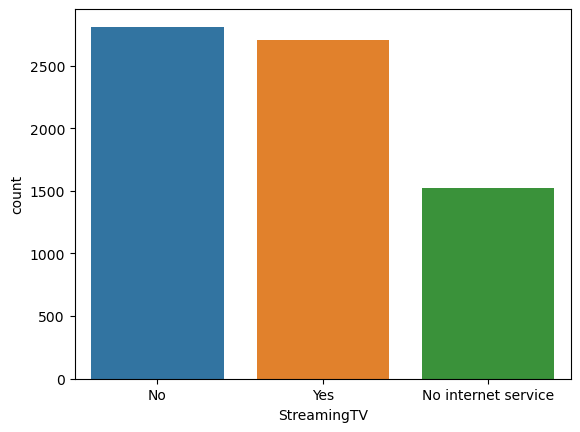

In [45]:
# visualizing how many customers have StreamingTV 
print(df['StreamingTV'].value_counts())
ax=sns.countplot(x='StreamingTV',data=df)

the customers who do not use streaming TV are little bit high in numbers than the customers who use Streaming TV, and the customer who do not own internet they do not have this service much

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


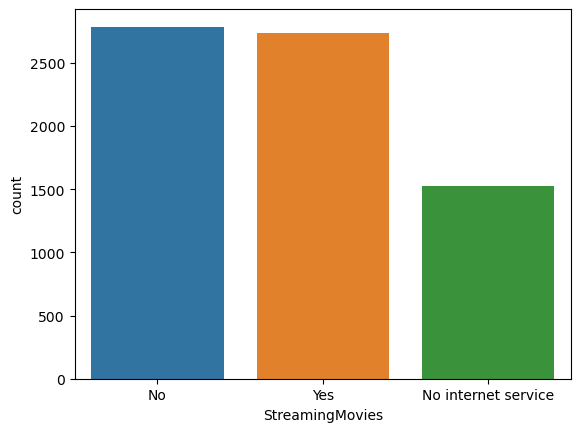

In [46]:
# visualizing how many customers have StreamingMovies 
print(df['StreamingMovies'].value_counts())
ax=sns.countplot(x='StreamingMovies',data=df)

the customers who do not use streaming movies are high in count followed by the customers who have Streaming movies services, and the customers who do not have internet services, they have less streaming movies services compared to others.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


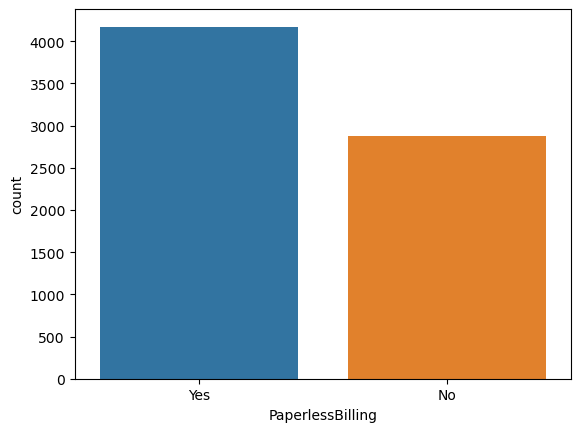

In [47]:
# visualizing how many customers have paymentMethod 
print(df['PaperlessBilling'].value_counts())
ax=sns.countplot(x='PaperlessBilling',data=df)

most of the customers prefer paper less billing and average number of customers who do not prefer paper less billing, they may like to receive paper billing.


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


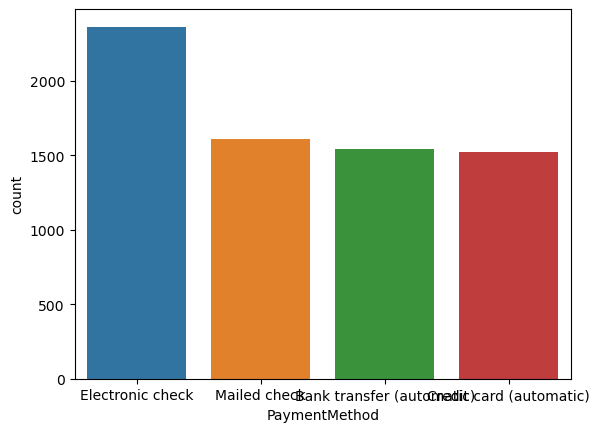

In [48]:
# visualizing the count of paymentMethod 
print(df['PaymentMethod'].value_counts())
ax=sns.countplot(x='PaymentMethod',data=df)

most customers prefer Electronic check payment method. and the customers who prefer Mailed check, Bank transfer,Credit card have average in count

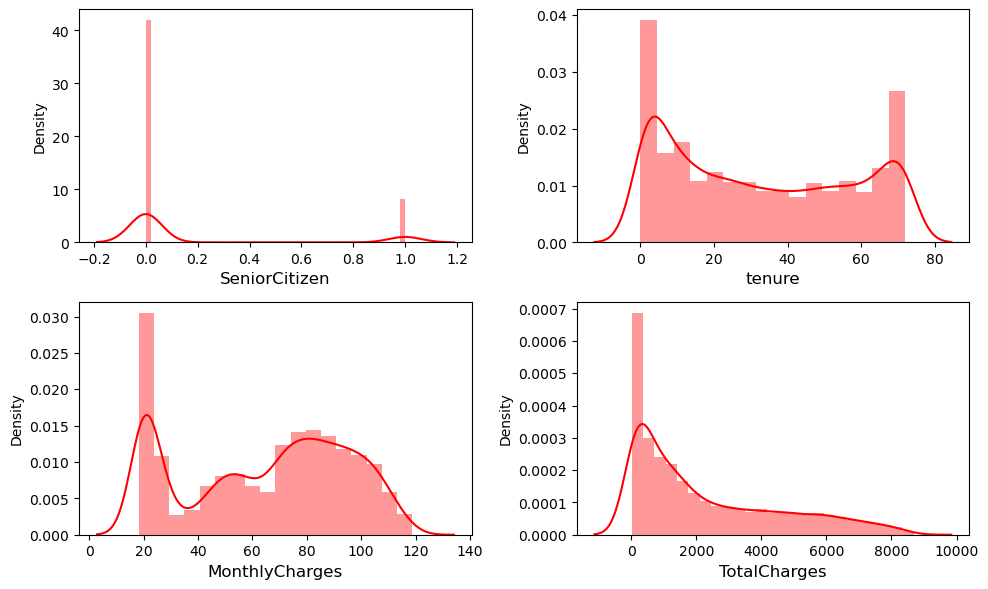

In [49]:
# lets check how data is distributed in Numerical column/ continous columns
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

from the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen,and the data in the column TotalCharges is skewed to the right.Other two columns tenure and MonthlyCharges do not have skewness(they almost looks normal, but they are not symmetrical data,they are not normally distributed).

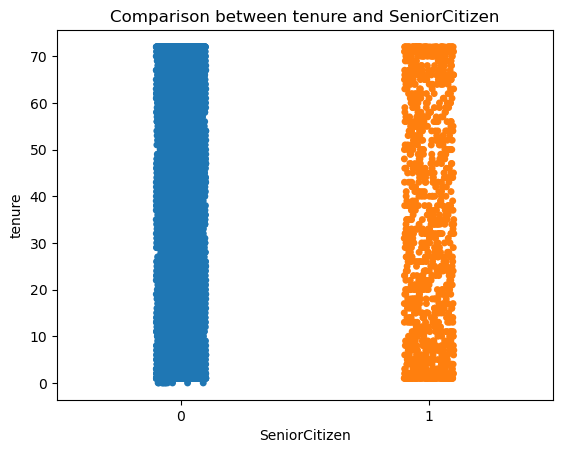

In [50]:
# Comparing tenure and seniorcitizen      (for that i am using stripplot)
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x="SeniorCitizen",y="tenure",data=df)
plt.show()

0 represents non SeniorCitizen and 1 represents SeniorCitizen. in both the cases the tenure is almost similar

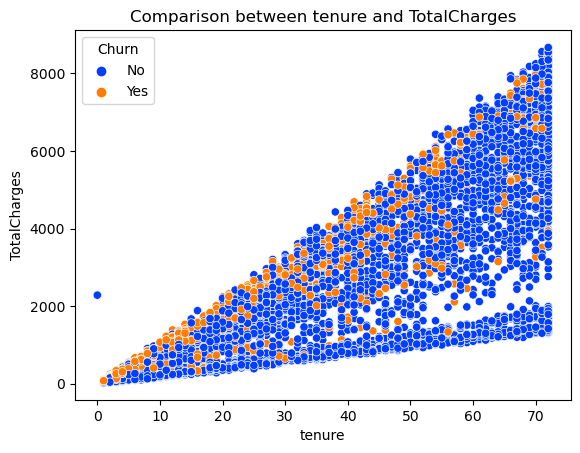

In [51]:
# comparing tenure and TotalCharges
plt.title("Comparison between tenure and TotalCharges")
sns.scatterplot(x="tenure",y="TotalCharges",data=df,hue='Churn',palette='bright')
plt.show()

Here we can notice the strong linear relation between the features because it is increasing here.
if the tenure is increasing the total charges also increasing rapidly but here you can also see, if the total charges is increasing then the number of yes,the number of customers those who are switching they are also increasing
if the tenure is very less then the churn rate is also high
in tenure, when it is 70,the number of customers who are churning are very less,who are switching are very less, means the atration rate when the tenure is high is very less.
the churn rate is also increasing whenthe total charges is increasing.

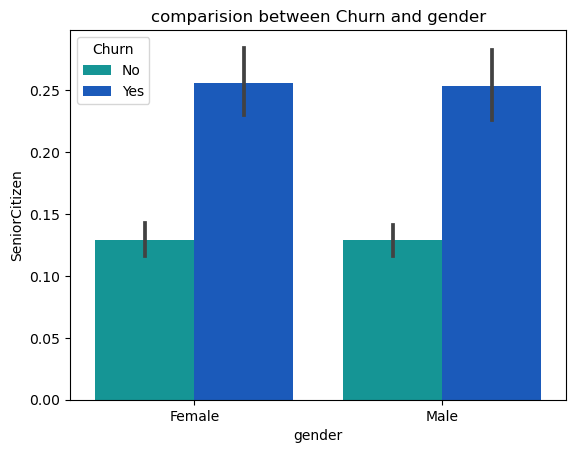

In [52]:
# comparing gender and SeniorCitizen on the basis of Churn   (using barplot)
plt.title("comparision between Churn and gender")
sns.barplot(x="gender",y="SeniorCitizen",data=df,palette='winter_r',hue='Churn')
plt.show()

there is no significant difference between the columns.The customers churns remain unaffected in gender and seniorcitizen case.

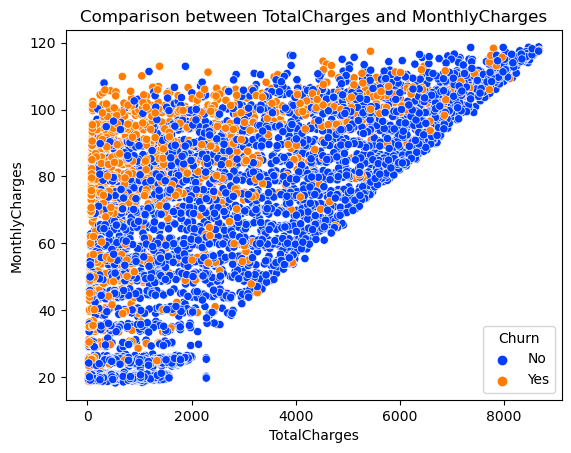

In [53]:
# comparing TotalCharges and MonthlyCharges
plt.title("Comparison between TotalCharges and MonthlyCharges")
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue='Churn',palette='bright')
plt.show()

There is a linear relationship between the features.The customers with high monthly charges have high tendency to stop the services(because here you can see the monthly charges is increasing the churn rate is also increasing),since they have high totalcharges.
if the customers ready to contribute with the monthlycharges then there is an increment in the totalcharges.(because if the monthlycharges column is increasing then overall their totalcharges column is also increasing.)

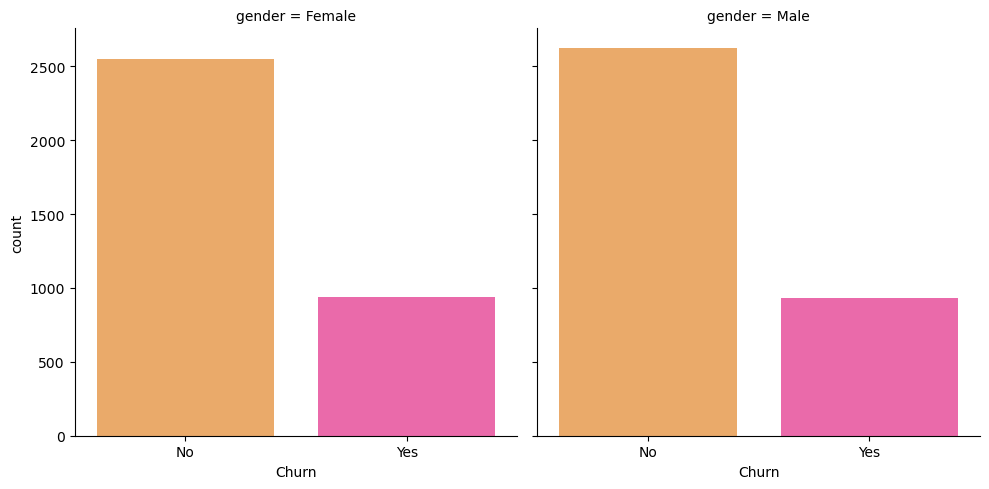

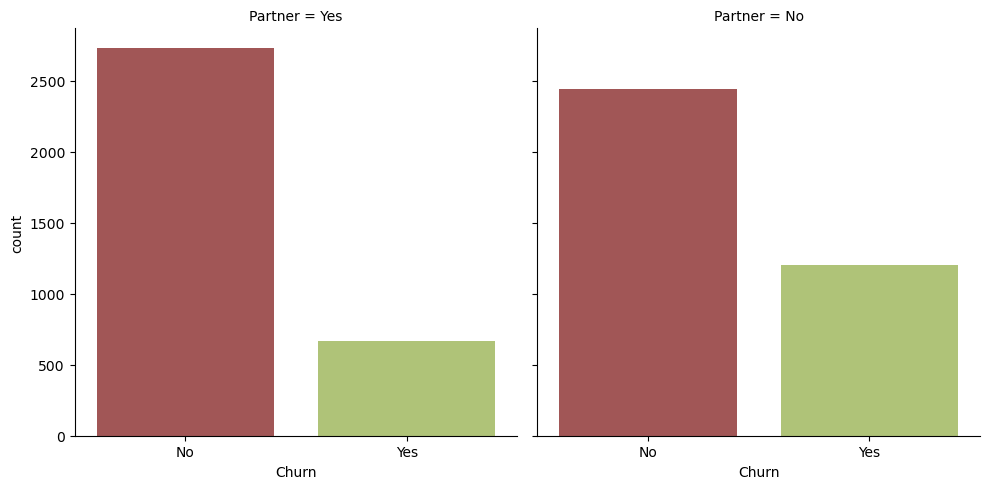

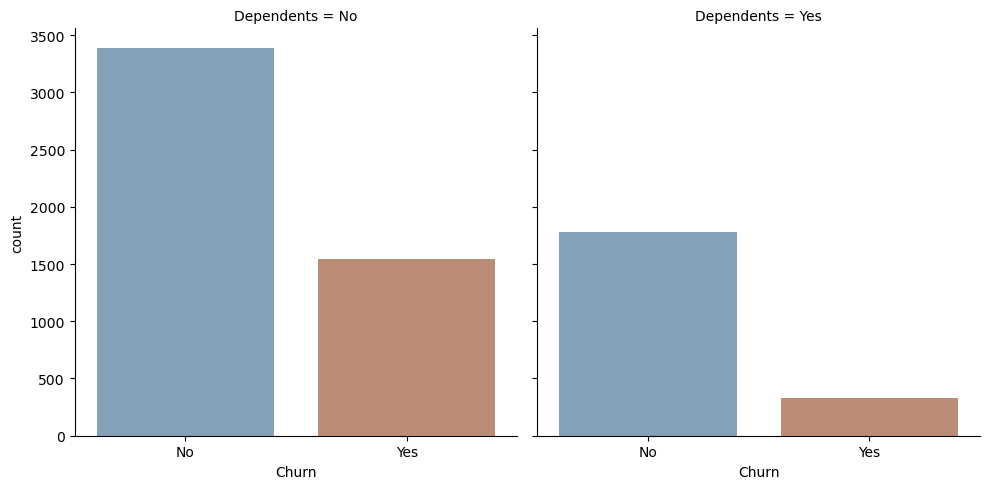

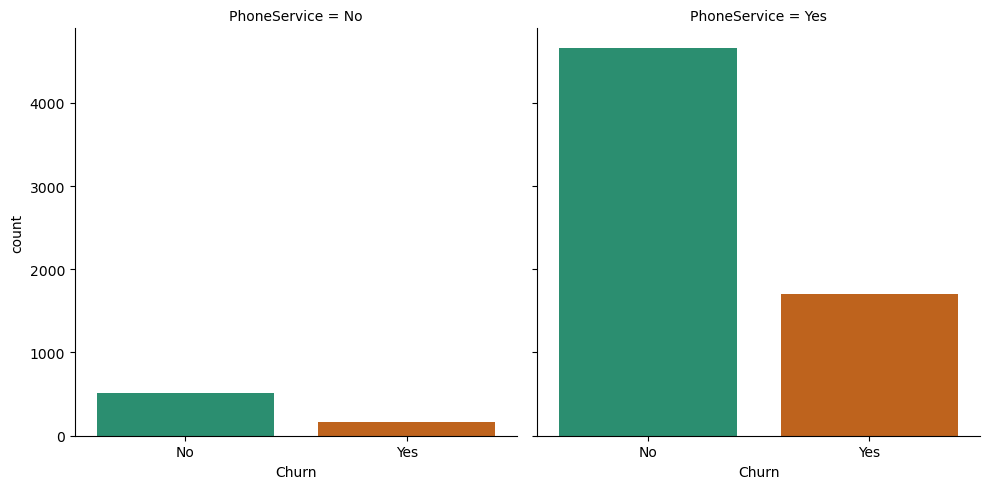

In [54]:
# checking churn level and gender
sns.catplot(x="Churn",col="gender",data=df,kind="count",palette="spring_r")

# checking churn level and Partner
sns.catplot(x="Churn",col="Partner",data=df,kind="count",palette="tab20b_r")

# checking churn level and Dependents
sns.catplot(x="Churn",col="Dependents",data=df,kind="count",palette="twilight_shifted")

# checking churn level and PhoneService
sns.catplot(x="Churn",col="PhoneService",data=df,kind="count",palette="Dark2")

plt.show()

1.in the first plot we can see there is no significant difference in the genders, have equal churn level  
2.in the second plot we can see the customers without partners have high churn rate compaired to the customers with partners  
3.The customers who do not have any dependency have high churn rate compared to the customers who have dependents.  
4.in the last plot we can notice the customers who have phone service have high tendency of getting churned.  

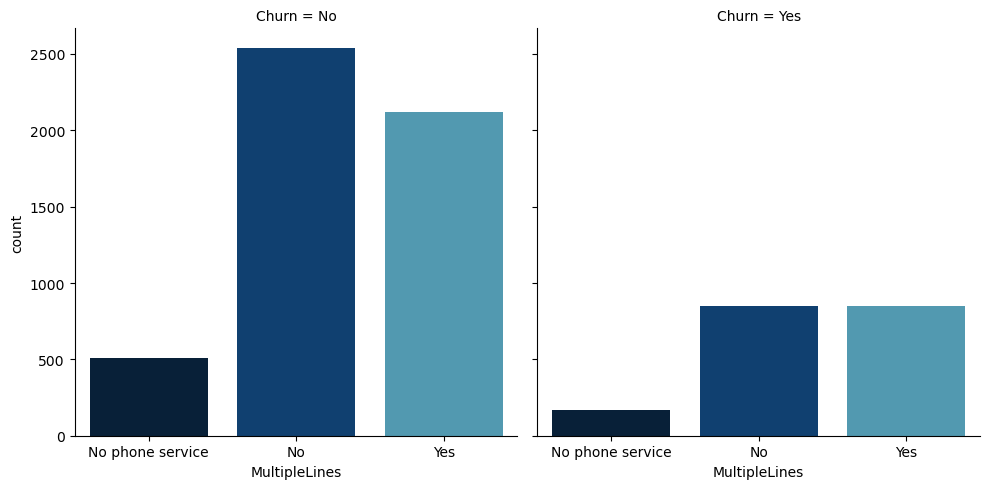

In [55]:
# checking churn level and multiplelines
sns.catplot(x='MultipleLines',col='Churn',palette='ocean',kind='count',data=df)
plt.show()

the customers who have phone services from single line and the customers who have phone services from multiple lines have equal churn rate,also there are very less number of customers who do not have phone services.

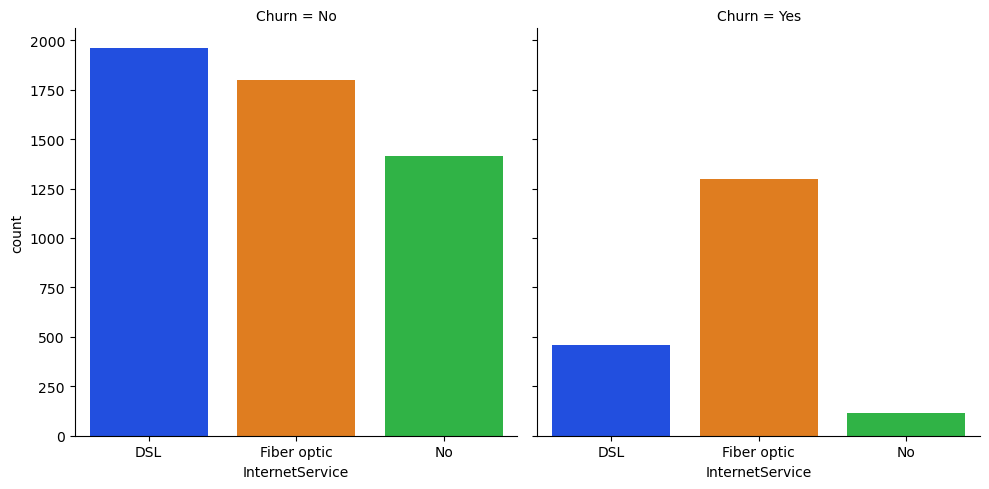

In [56]:
# checking churn level in InternetService
sns.catplot(x='InternetService',col='Churn',palette='bright',kind='count',data=df)
plt.show()

the ratio of the churn is high when the customer prefer fiber optic internet services compared to other services,may be this type of service is bad and need to be focused on.And the customers who owns DSL service they have very less churn rate(see in the left side graph)

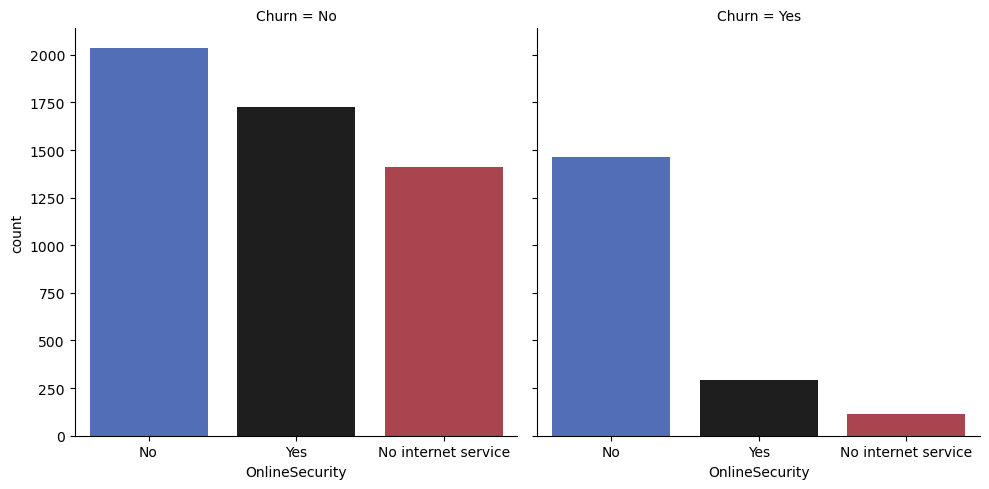

In [57]:
# checking churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette='icefire',kind='count',data=df)
plt.show()

the customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency of getting churned.

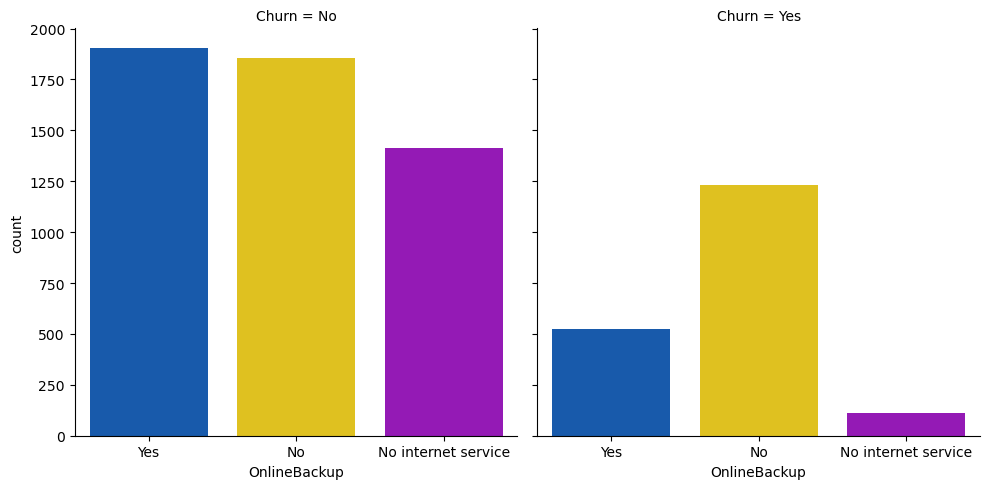

In [58]:
# checking churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette='prism',kind='count',data=df)
plt.show()

it is also same as in the case of online security.it is obvious that the customers who do not have internet services they do not need any online backup.The customers who do not have online backup services they have high churn rate.

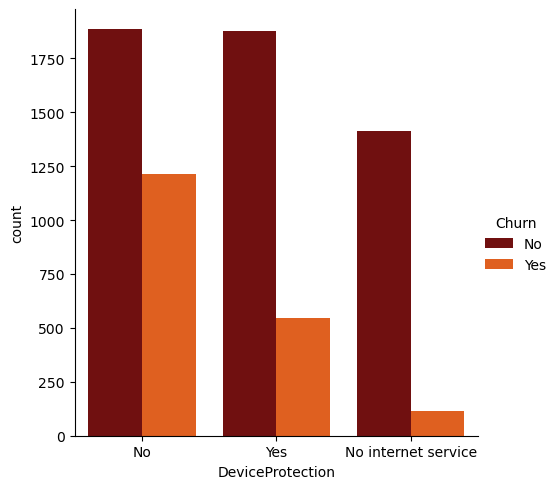

In [59]:
# checking churn level in DeviceProtection
sns.catplot(x='DeviceProtection',hue='Churn',palette='gist_heat',kind='count',data=df)
plt.show()

the customers who do not own any device protection have very high churn rate compared to others

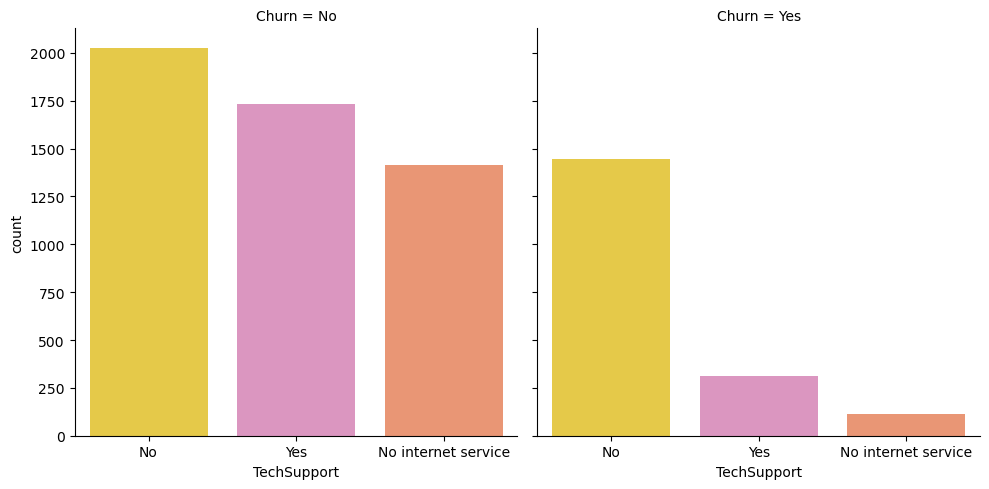

In [60]:
# checking churn level in TechSupport
sns.catplot(x='TechSupport',col='Churn',palette='Set2_r',kind='count',data=df)
plt.show()

here we can clearly see that the customers who do not have any techsupport then they have high churn ratio

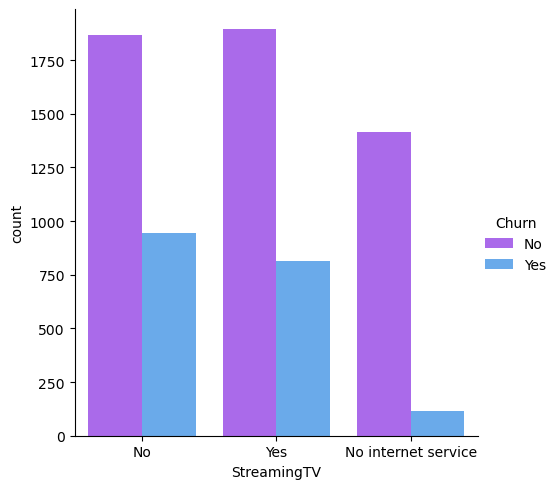

In [61]:
# checking churn level in StreamingTV
sns.catplot(x='StreamingTV',hue='Churn',palette='cool_r',kind='count',data=df)
plt.show()

the churn rate is nearly same if the customer own StreamingTV or not

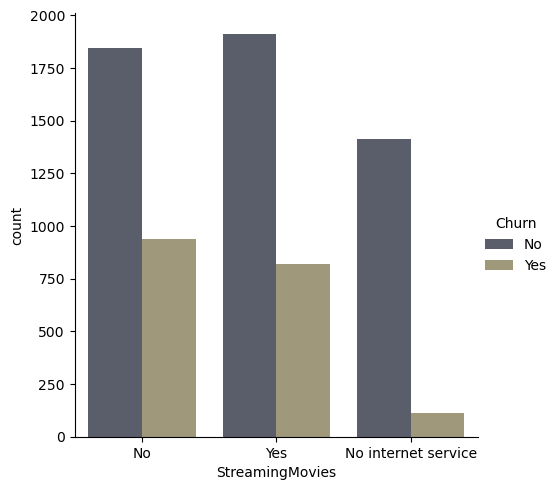

In [62]:
# checking churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette='cividis',kind='count',data=df)
plt.show()

customers having internet service and not having streaming movies are churning little bit more as compared to customers having internet service and having streaming movies. and the churn rate is low when the customer do not have internet service.

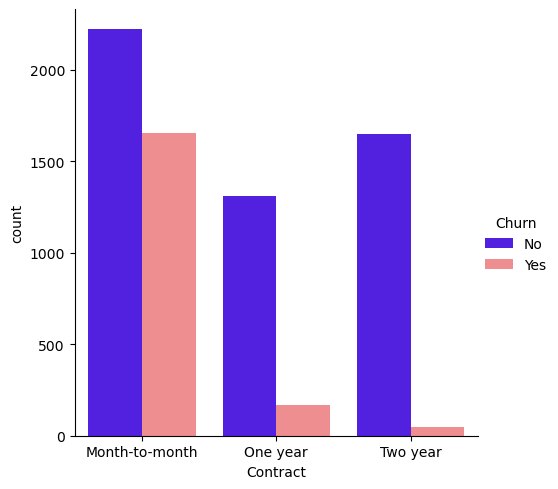

In [63]:
# checking churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette='gnuplot2',kind='count',data=df)
plt.show()

the customers who have churned are mostly having month to month contract

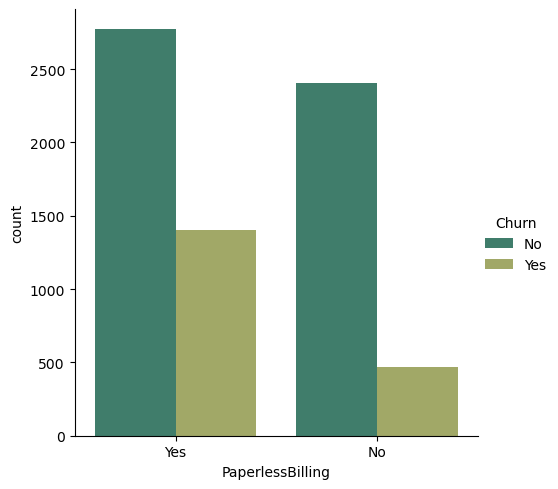

In [64]:
# checking churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette='gist_earth',kind='count',data=df)
plt.show()

the customers who prefer paperless billing they have high rate

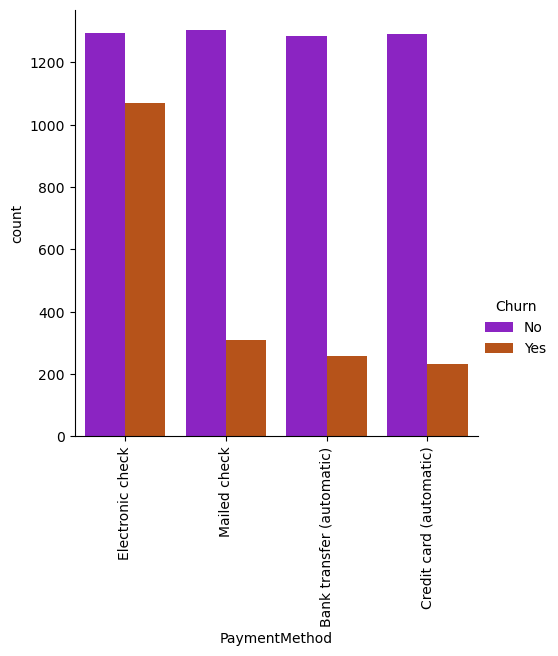

In [65]:
# checking churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette='gnuplot',kind='count',data=df)
plt.xticks(rotation=90)
plt.show()

the customers who prefer Electronic check have high churn rate also the customers who exist in the company uses equal payment method.

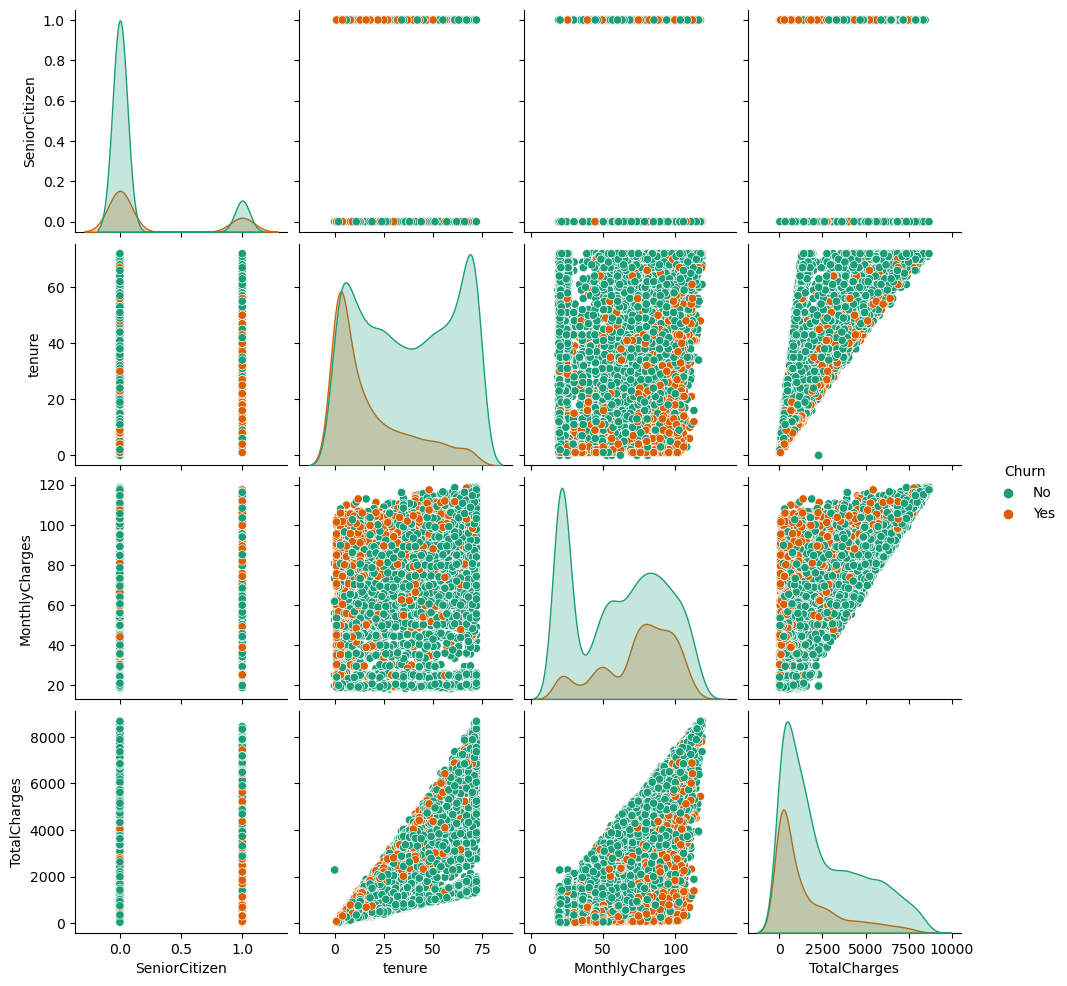

In [66]:
sns.pairplot(df,hue='Churn',palette='Dark2')
plt.show()

1.the pair plot gives the pairwise relation between the features on the basis of the target"Churn".On the diagonal we can notice the distribution plots.  
2.the features tenure and TotalCharges,MonthlyCharges and TotalCharges have strong linear relation with each other.  
3.there are no outliers in any of the columns but let's plot boxplot to identify the Outliers.

# Checking for Outliers

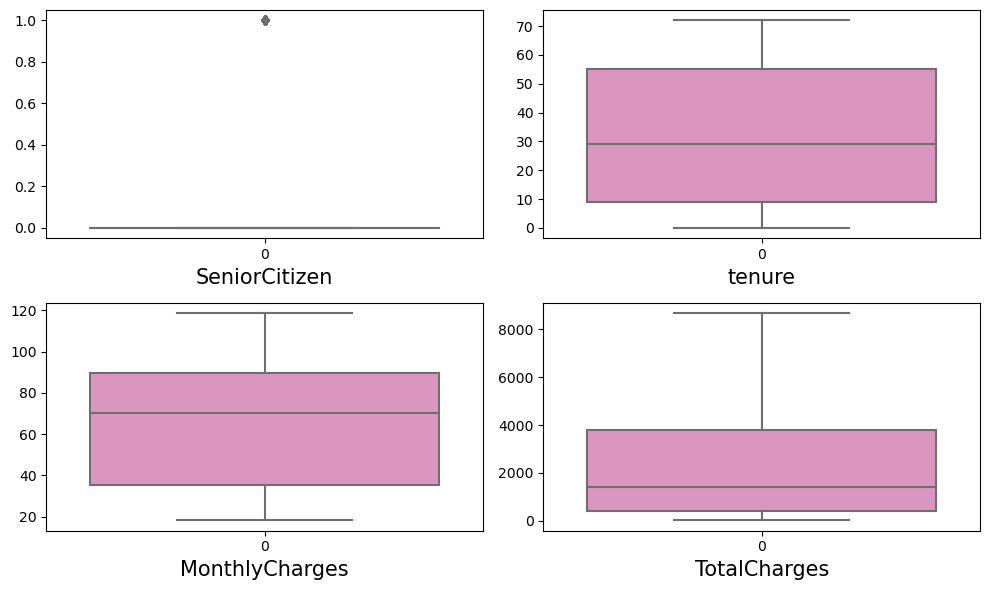

In [67]:
# lets check the outliers by plotting boxplot
plt.figure(figsize=(10,6), facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data=df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(fontsize=10,rotation=0)
    plotnumber+=1
plt.tight_layout() 

the column seniorcitizen has outliers,but it contains categorical data(because it has the 0,1 values but the number of unique values is very less that is only 2 and the size of the data is 7043.so senior citizen is categorical data) and i have already told you we do not/no need to remove outliers,if it is present in my categorical data and we also do not detect.
but seniorcitizen is a part of my numerical column(list) so we were detecting here.so after detecting we find out there is an outlier, but as we do not remove outlier from the categorical data so we are not go to remove the outlier. Apart from this non of the columns have outliers

In [68]:
# checking skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

the column Seniorcitizen and TotalCharges have skewness in the data, if i talk about tenure and monthlycharges column their skewness value is 0.23 and-0.22 so is in acceptable range.  
since seniorcitizen is categorical no need to remove skewness.since Totalcharges is continous in nature. so we are going to apply cube root or any other method to remove skewness.

## Removing skewness

In [69]:
df['TotalCharges']=np.cbrt(df['TotalCharges'])

we removed the skewness using cube root mehod

In [70]:
# checking the skewness again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

Totalcharges sknewness value is very close to zero it means it is almost symmetrical data now,and it is more symetrical as compair to remaining 3 columns  

we can see the skewness has been reduced in TotalCharges column, and we can conform it by using the distribution plot.

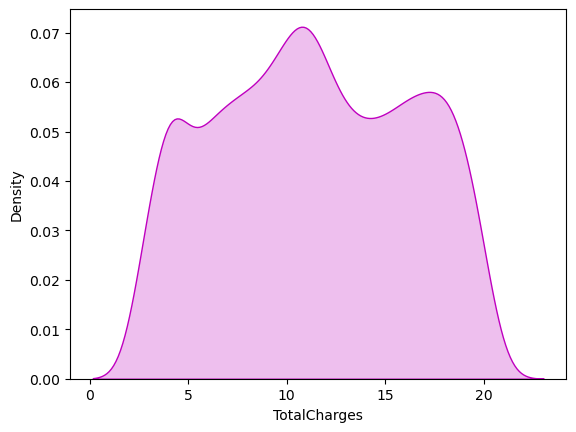

In [72]:
#lets visualize how the data has been distributed in TotalCharges column after removing skewness
sns.distplot(df['TotalCharges'],color='m',kde_kws={"shade":True},hist=False)
plt.show()

this looks normal and the skewness is also removed

# Encoding categorical columns

In [73]:
# here i am using Ordinal Encoder for encoding categorical column
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df      

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [75]:
# now we are applying describe method,all the columns are continous data so thats why it is applyed on the whole data
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


# correlation between target variable and independent variables.

In [76]:
# checking the correlation between features and the target
cor=df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


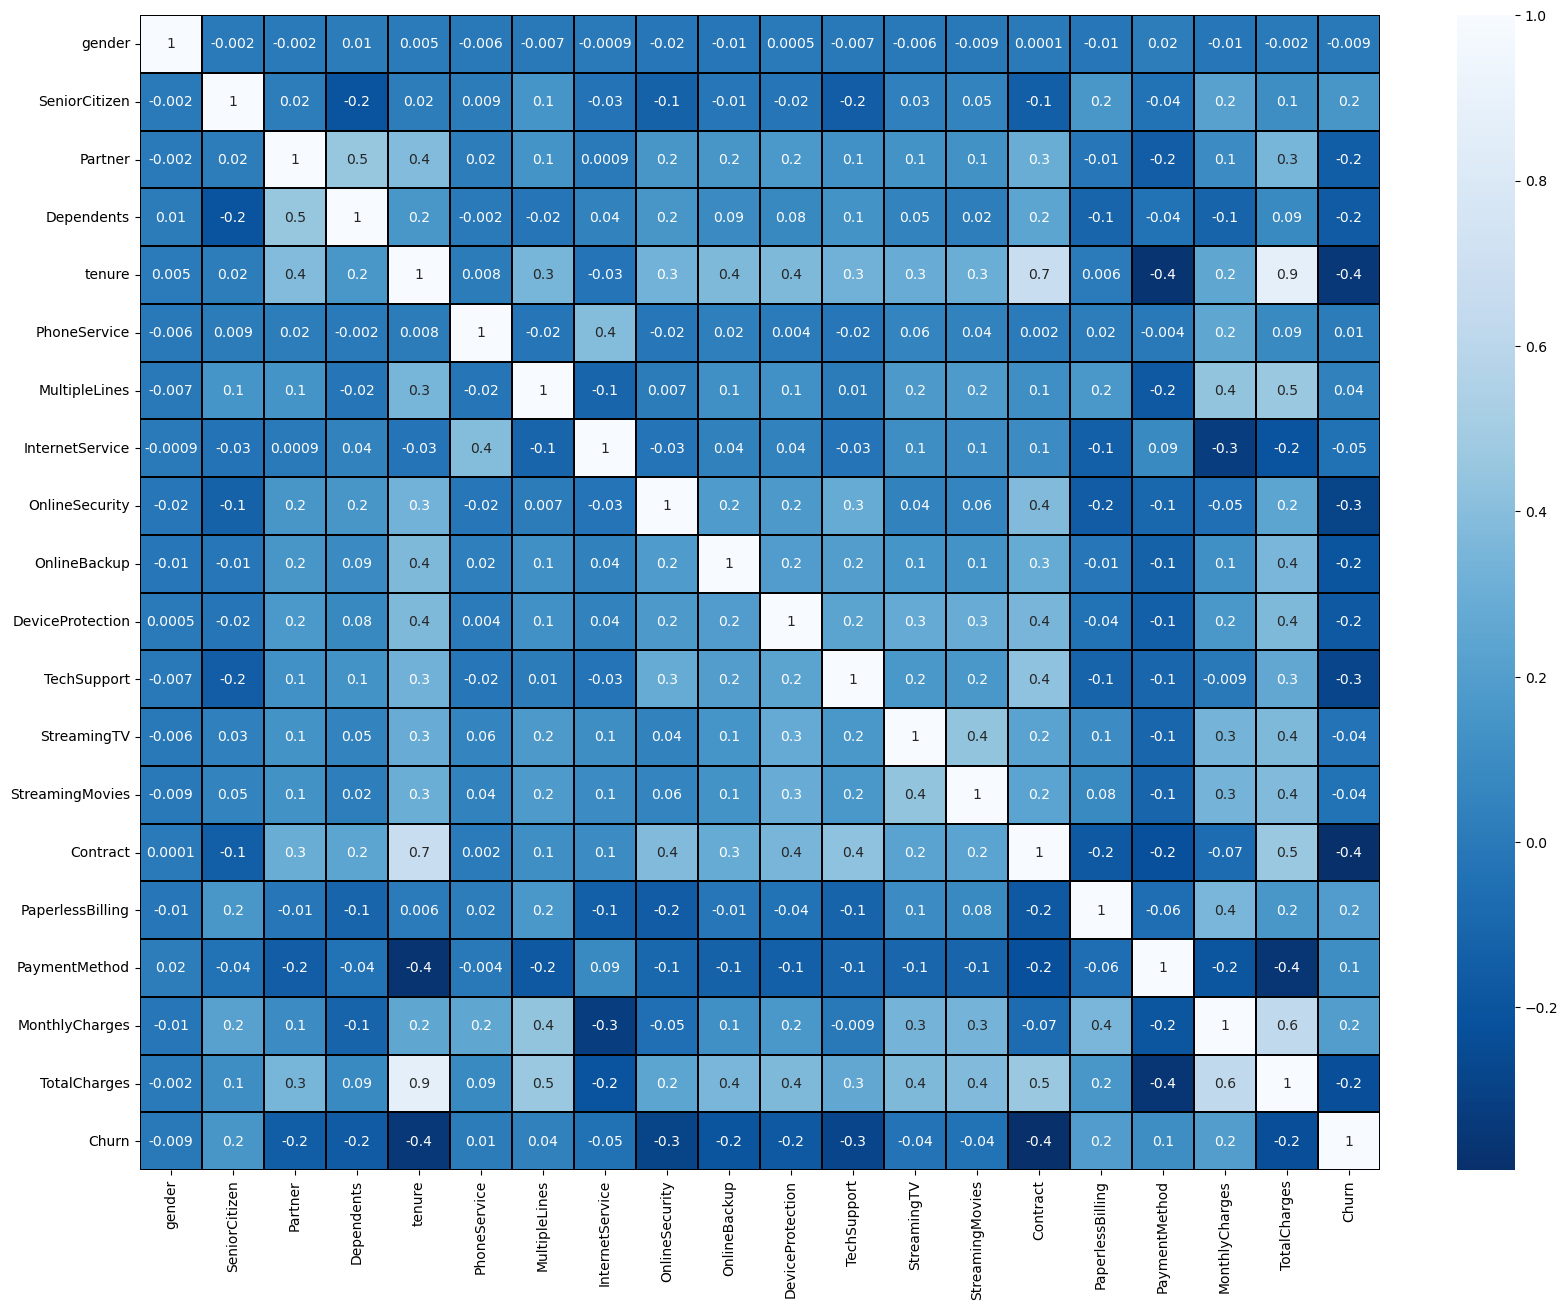

In [77]:
# visualizing the correlation by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

This heatmap shows the correlation matrix by visualizing the data.We can observe the relation between feature to feature and feature to label.This heatmap contains both positive and negative correlation  

There is no much positive correlation between the target and features.  
The column MonthlyCharges,PaperlessBilling,SeniorCitizen and paymentMethod have positive correlation with the label column"Churn".  
The label is negative correlated with Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,DeviceProtection,OnlineBackup,Partner and dependents.  
Also the column gender has very less correlation with the label,we can Drop it if necessary.  
The column TotalCharges and Tenure,Contract and Tenure,TotalCharge and MonthlyCharges and many other columns have high correlation with each other.  

In [78]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

we can observe the positive and negative correlated features with the Target.

# visualizing the correlation between label and features using bar plot

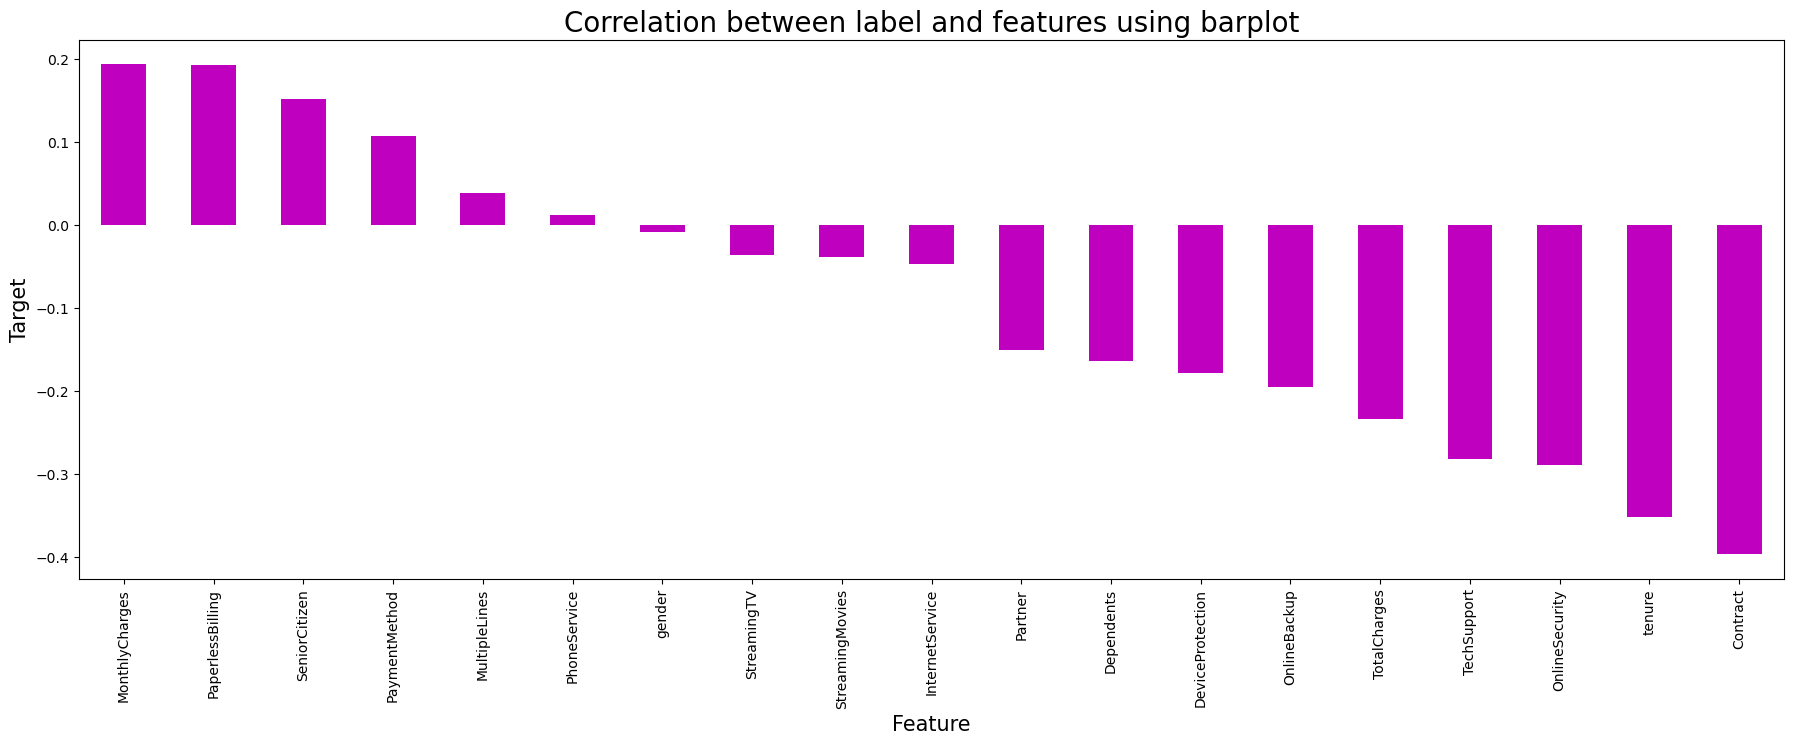

In [79]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

from the above bar plot we can notice the positive and negative correlation between the features and the target.Here the features gender and PhoneService have very less correlation with the column.

# seperating features and label

In [80]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

# Feature Scaling using Standard Scalarization

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have Scaled the data using standard Scalarization method to overcome the issue of biasness

# Checking variance inflation factor

In [82]:
# finding variance inflation factor in each scaled column i.e, x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


here we can find the feature TotalCharges and Tenure have vif value greater than 10 which means they have high correlation with other features.we will drop one of the column first, if the same issue exist then we will try to remove the column having high vif.

In [83]:
# Dropping TotalCharges column
x.drop("TotalCharges",axis=1,inplace=True)

In [84]:
# Again checking vif value to confirm whether the multicolinearity still exists or not(reduced or not)
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So,we have solved multicolinearity issue.we can now move ahead for model building

In [85]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

here we can see the data is not balanced,since it is a classification problem we will balance the data using oversampling method

# Oversampling

we are balancing the class so that the amount of the data that is given to my model for the learning purpose is exactly equal,if it is not equal and my model have learned more about one class then definitely it will effect the performance of my model and it can create the biasness also, so thats why i am using the smote method

In [86]:
# oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y =SM.fit_resample(x,y)

In [87]:
# Checking value count of target column
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

when i am checking the value count function, the values the count of both the classes are same( earlier there was 73% and 27% distribution), now it is 1:1 .

# Modelling
## finding the best random state

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0         # maximum accuracy
maxRS=0           # maximum random state
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)   # to confirm that prediction made by model is correct or not(compairing with original target value)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Best accuracy is",maxAccu,"at random_state",maxRS)        

 Best accuracy is 0.8682769726247987 at random_state 40


# creating train test split

In [89]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [90]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [91]:
# checking accuracy for RandomForestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8628019323671497
[[1296  212]
 [ 214 1383]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1508
         1.0       0.87      0.87      0.87      1597

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



The accuracy for this model is 86%

# Logistic Regression

In [92]:
# checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7777777777777778
[[1111  397]
 [ 293 1304]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1508
         1.0       0.77      0.82      0.79      1597

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



The accuracy for this model is 78%

# Support Vector Machine Classifier

In [94]:
# checking accuracy for Support Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.808695652173913
[[1166  342]
 [ 252 1345]]
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80      1508
         1.0       0.80      0.84      0.82      1597

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



the accuracy score for Support Vector Machine Classifier is 81%

# GradientBoostingClassifier

In [95]:
# checking accuracy for GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8524959742351047
[[1245  263]
 [ 195 1402]]
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1508
         1.0       0.84      0.88      0.86      1597

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



the accuracy score for GradientBoosting Classifier is 85%

# AdaBoost Classifier

In [97]:
# checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8183574879227054
[[1178  330]
 [ 234 1363]]
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81      1508
         1.0       0.81      0.85      0.83      1597

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



the accuracy score for AdaBoost Classifier is 82%

# BaggingClassifier

In [98]:
# checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8280193236714976
[[1288  220]
 [ 314 1283]]
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83      1508
         1.0       0.85      0.80      0.83      1597

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



the accuracy score for Bagging Classifier is 83% 

# ExtraTreesClassifier

In [99]:
# checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8698872785829308
[[1301  207]
 [ 197 1400]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1508
         1.0       0.87      0.88      0.87      1597

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



the accuracy score for ExtraTrees Classifier is 87%

# cross valdation score

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
# checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predRFC)-score.mean())

[0.76956522 0.78647343 0.89710145 0.90236829 0.90478492]
0.8520586621462911
Difference between Accuracy score and cross validation score is- 0.010743270220858636


In [102]:
# checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predLR)-score.mean())

[0.77149758 0.7589372  0.76425121 0.79265346 0.78250362]
0.7739686142106972
Difference between Accuracy score and cross validation score is- 0.003809163567080609


In [103]:
# checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predGB)-score.mean())

[0.7531401  0.77971014 0.87149758 0.88496858 0.88593523]
0.8350503288713306
Difference between Accuracy score and cross validation score is- 0.01744564536377413


In [104]:
# checking cv score for Support vector machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predsvc)-score.mean())

[0.77584541 0.76956522 0.80821256 0.83035283 0.83421943]
0.803639089106969
Difference between Accuracy score and cross validation score is- 0.00505656306694402


In [105]:
# checking cv score for Adaboost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predABC)-score.mean())

[0.76714976 0.76570048 0.83236715 0.84775254 0.85258579]
0.8131111437997772
Difference between Accuracy score and cross validation score is- 0.005246344122928126


In [106]:
# checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predBC)-score.mean())

[0.73091787 0.76086957 0.86763285 0.88593523 0.87433543]
0.8239381904021407
Difference between Accuracy score and cross validation score is- 0.004081133269356885


In [107]:
# checking cv score for Support ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is-',accuracy_score(y_test,predET)-score.mean())

[0.81400966 0.80869565 0.89613527 0.90671822 0.90961817]
0.8670353948207143
Difference between Accuracy score and cross validation score is- 0.002851883762216456


Extra TreesClassifier is our best model

# Hyper parameter tuning

In [108]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [109]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [111]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [112]:
Final_model=ExtraTreesClassifier(criterion= 'entropy',max_depth= 20, n_estimators= 300,n_jobs= -2,random_state= 10)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.47181964573268


# saving the model

In [114]:
# saving the model using joblib and .pkl extension
import joblib
joblib.dump(Final_model,"Telecom_Customer_ChurnAnalysis.pkl")

['Telecom_Customer_ChurnAnalysis.pkl']

# Reload the saved model

In [115]:
# lets load the saved model and get the prediction
model=joblib.load('Telecom_Customer_ChurnAnalysis.pkl')

# predictions
prediction=model.predict(x_test)
prediction

array([0., 1., 1., ..., 1., 0., 1.])

In [116]:
# creating a dataframe
conclusion=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
Predicted,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
Original,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
